Numpy is a library that provides support for high performance numeric operations on arrays. Although it supports multidimensional arrays, today we're just going to look at one-dimensional arrays, which are like lists.

In [1]:
# to use numpy, import it
import numpy as np

# numpy provides an array type
# create an array
fib = [1, 1, 2, 3, 5, 8, 13]
a = np.array(fib)
a

array([ 1,  1,  2,  3,  5,  8, 13])

Unlike lists, all elements of an array are of the same type. This is called the array's "dtype":

In [2]:
# arrays have data types called "dtypes"
# all elements of the array must have the same dtype
a.dtype

dtype('int32')

In [3]:
# when constructing an array, numpy
# tries to make all the values the same dtype
np.array([1, 'joe', False])

array(['1', 'joe', 'False'], dtype='<U11')

Arrays can be accessed by indexes or slices, just like lists

In [4]:
# index
a[2]

2

In [5]:
# slice
a[2:7]

array([ 2,  3,  5,  8, 13])

Importantly, arrays support bulk operations which are performed element-wise. This is called vectorization.

In [6]:
-1 * a

array([ -1,  -1,  -2,  -3,  -5,  -8, -13])

In [7]:
a + a

array([ 2,  2,  4,  6, 10, 16, 26])

Arrays also support vectorized aggregation functions.

In [8]:
a.mean()

4.714285714285714

In [9]:
a.max()

13

In [10]:
a.argmax()

6

Numpy provides many ways to initialize arrays.

In [11]:
np.ones(shape=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
r = np.random.normal(size=10)
r

array([ 0.96902161, -0.0243836 ,  0.70801781,  0.50825671, -0.30455486,
        0.10618457,  0.39233087,  1.12750813, -0.7170875 ,  0.36970852])

Numpy adds the ability to handle missing values, using `np.nan`

In [13]:
r[2] = np.nan
r

array([ 0.96902161, -0.0243836 ,         nan,  0.50825671, -0.30455486,
        0.10618457,  0.39233087,  1.12750813, -0.7170875 ,  0.36970852])

In [14]:
# NaNs propagate across operations
r + 10

array([10.96902161,  9.9756164 ,         nan, 10.50825671,  9.69544514,
       10.10618457, 10.39233087, 11.12750813,  9.2829125 , 10.36970852])

In [15]:
# important limitation: integers cannot be NaNs
my_array = np.array([1, 2, 3, 4, 5], dtype='int')
my_array

array([1, 2, 3, 4, 5])

In [16]:
try:
    my_array[2] = np.nan
except ValueError as e:
    print(e)

cannot convert float NaN to integer


In [17]:
# to fix this in numpy you must convert your array to a different dtype
maf = my_array.astype('float')
maf[2] = np.nan
maf

array([ 1.,  2., nan,  4.,  5.])

An important thing about arrays is that performing operations on them usually does not copy the underlying data. This can cause subtle effects.

In [18]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [19]:
# this operation does not copy the data
b = a.copy()
b

array([1, 2, 3, 4, 5])

In [20]:
# if you modify a's data, b will reflect that
# because it is backed by the same array
a[0] = 100
a


array([100,   2,   3,   4,   5])

In [21]:
b

array([1, 2, 3, 4, 5])

In [22]:
# if you don't want this behavior, use copy
a = np.array([1, 2, 3, 4, 5])
b = a.copy()
a[0] = 100
b

array([1, 2, 3, 4, 5])

When using Pandas, this aspect of numpy can be confusing. Fortunately the Pandas documentation is very explicit about when it will and won't copy data.

numpy provides a large number of vectorized operations on arrays.

In [23]:
# generate a range of values
coords = np.arange(-10, 11)
coords

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [24]:
# perform an operation on a range of values
coords = np.arange(-20, 20, 0.1)
coords[:5]

array([-20. , -19.9, -19.8, -19.7, -19.6])

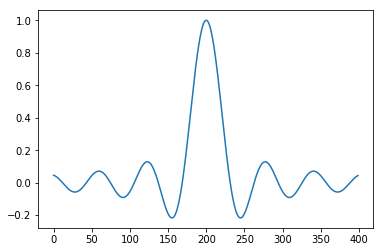

In [25]:
# compute an expression over the array
sinc = np.sin(coords) / coords

%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(sinc);

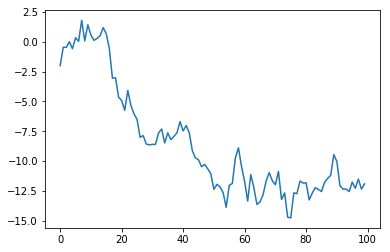

In [26]:
# example: create some random data
# this example uses
# - libraries (matplotlib, numpy)
# - arrays
# - vectorized operations
# - function nesting
# - keyword arguments
plt.plot(np.cumsum(np.random.normal(size=100)));

In [27]:
# numpy arrays can contain strings

names = np.array(['John','Paul','George','Ringo'])
names

array(['John', 'Paul', 'George', 'Ringo'], dtype='<U6')

In [28]:
# example: random permutation
np.random.shuffle(names)
names

array(['Paul', 'George', 'John', 'Ringo'], dtype='<U6')

In [29]:
# indexing is still positional
names[0]

'Paul'